In [14]:
%matplotlib inline
import pandas as pd
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
init_notebook_mode(connected=True)


# Davis Club


Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


In [1]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
#print('')
#print("#Friends, Member")
#for w in women:
#    print('%d %s' % (W.degree(w), w))

# project bipartite graph onto clubs nodes
C = bipartite.projected_graph(G, clubs)

# project bipartite graph onto women nodes keeping number of co-occurences, weighted degree
WW = bipartite.weighted_projected_graph(G, women)
#print('')
#print("#Friend meetings, Member")
#for w in women:
#    print('%d %s' % (WW.degree(w, weight='weight'), w))

# project bipartite graph onto club nodes keeping number of co-occurences, weighted degree
CW = bipartite.weighted_projected_graph(G, clubs, ratio=False)

### Quick graph info

In [3]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


### Nodes
The nodes in this graph are both the women and the clubs.  There are 32 nodes, 18 women nodes and 14 club nodes.

In [9]:
print("Clubs:", len([x for x in G.nodes() if any(map(str.isdigit, x))]))
print("Women:", len([x for x in G.nodes() if not any(map(str.isdigit, x))]))

Clubs: 14
Women: 18


### Edges
The edges in this graph consist of the women and the clubs they attended.  There are 89 edges.

In [4]:
len(list(G.edges()))

89

### Graph diameter
The graph diameter is 4.  It is a closely connected graph.  There are only 4 edges to traverse between the 2 most distant nodes.

In [133]:
nx.diameter(G)

4

### Graph Visualization

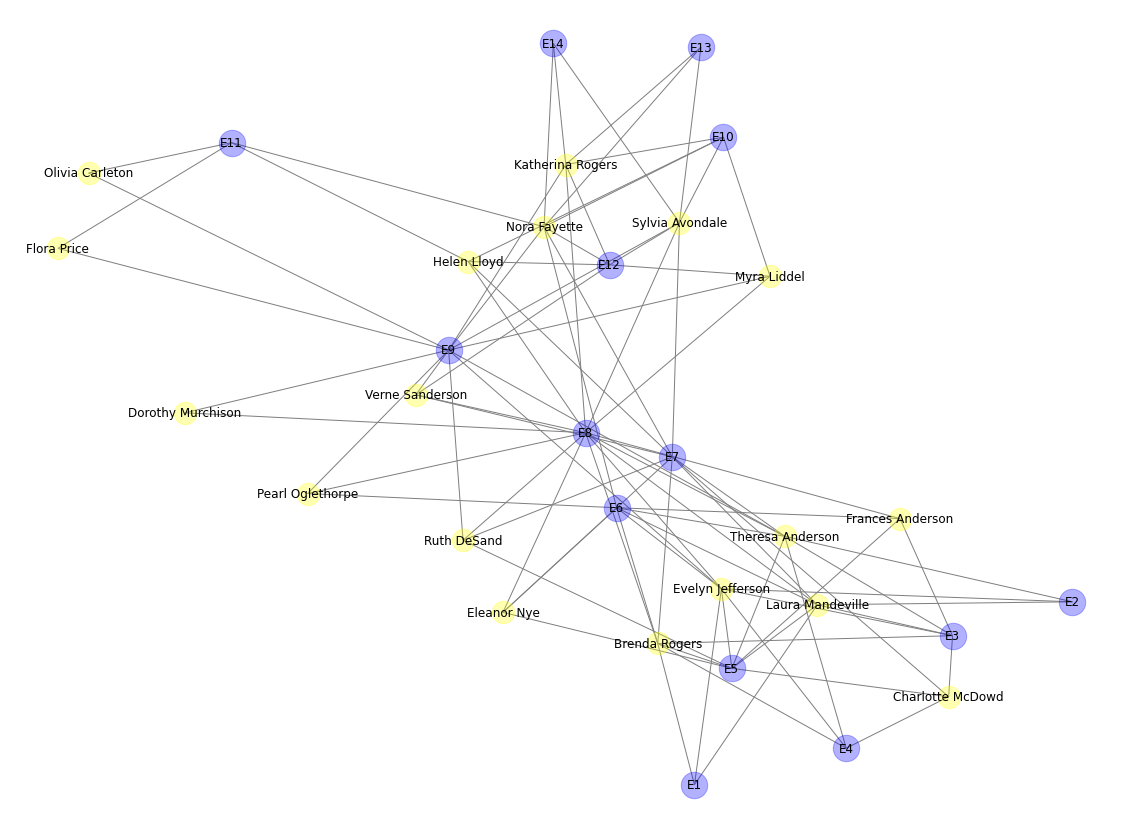

In [29]:
plt.figure(figsize=(20,15))
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist = women, node_color = 'yellow', alpha = 0.3, node_size = 500)
nx.draw_networkx_nodes(G, pos, nodelist = clubs, node_color = 'blue', alpha = 0.3, node_size = 700)
nx.draw_networkx_edges(G, pos, edge_color = 'gray')
nx.draw_networkx_labels(G, pos);

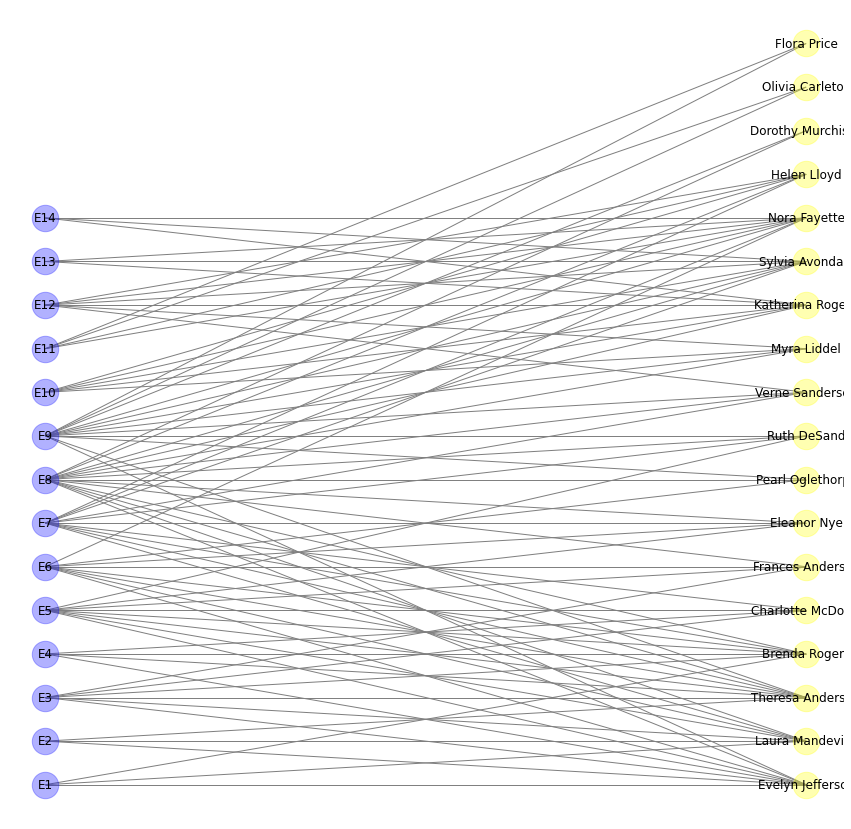

In [30]:
plt.figure(figsize=(15,15))
plt.axis('off')
pos.update((node, (1, index)) for index, node in enumerate(clubs))
pos.update((node, (2, index)) for index, node in enumerate(women))
nx.draw_networkx_nodes(G, pos, nodelist = women, node_color = 'yellow', alpha = 0.3, node_size = 700)
nx.draw_networkx_nodes(G, pos, nodelist = clubs, node_color = 'blue', alpha = 0.3, node_size = 700)
nx.draw_networkx_edges(G, pos, edge_color = 'gray')
nx.draw_networkx_labels(G, pos);

### Women Degrees
The degrees for the women nodes is the number of clubs they attended.

In [37]:
w_deg = {k:v for k,v in dict(G.degree(women)).items()}
print('Women Degrees - Clubs Attended')
for woman, club in sorted([(x,y) 
              for x,y in w_deg.items()], 
              key=lambda x: x[1], reverse=True):
    print('{} -'.format(woman), 'Clubs:',club)

Women Degrees - Clubs Attended
Evelyn Jefferson - Clubs: 8
Theresa Anderson - Clubs: 8
Nora Fayette - Clubs: 8
Laura Mandeville - Clubs: 7
Brenda Rogers - Clubs: 7
Sylvia Avondale - Clubs: 7
Katherina Rogers - Clubs: 6
Helen Lloyd - Clubs: 5
Charlotte McDowd - Clubs: 4
Frances Anderson - Clubs: 4
Eleanor Nye - Clubs: 4
Ruth DeSand - Clubs: 4
Verne Sanderson - Clubs: 4
Myra Liddel - Clubs: 4
Pearl Oglethorpe - Clubs: 3
Dorothy Murchison - Clubs: 2
Olivia Carleton - Clubs: 2
Flora Price - Clubs: 2


### Clubs Degrees
The degrees for the club nodes is the number of women that attended that club.

In [38]:
c_deg = {k:v for k,v in dict(G.degree(clubs)).items()}
print('Club Degrees - Women Attended')
for club, degree in sorted([(x,y) 
                             for x,y in c_deg.items()], 
                             key=lambda x: x[1], reverse=True):
    print('{} -'.format(club), 'Women Attended:',degree)

Club Degrees - Women Attended
E8 - Women Attended: 14
E9 - Women Attended: 12
E7 - Women Attended: 10
E5 - Women Attended: 8
E6 - Women Attended: 8
E3 - Women Attended: 6
E12 - Women Attended: 6
E10 - Women Attended: 5
E4 - Women Attended: 4
E11 - Women Attended: 4
E1 - Women Attended: 3
E2 - Women Attended: 3
E13 - Women Attended: 3
E14 - Women Attended: 3


### Women Network Visualization

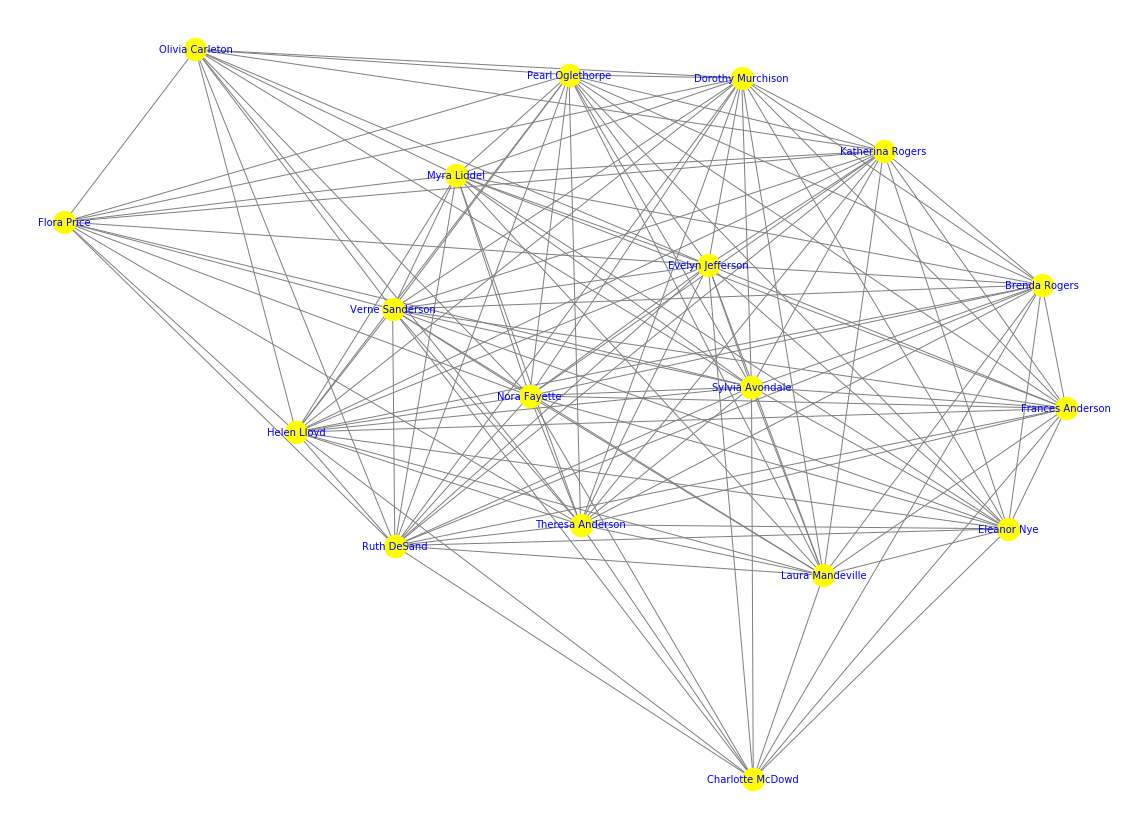

In [138]:
plt.figure(figsize=(20,15))
plt.axis('off')
pos = nx.spring_layout(W)
nx.draw_networkx_nodes(W, pos, node_color='yellow', node_size=500)
nx.draw_networkx_edges(W, pos, edge_color = 'gray')
nx.draw_networkx_labels(W, pos, font_size=10, font_color ='blue')
plt.show()

### Women Network Degrees

In [139]:
deg = nx.degree(W)
max_deg = sorted(deg, key=lambda x: x[1], reverse=True)
max_deg

[('Evelyn Jefferson', 17),
 ('Theresa Anderson', 17),
 ('Ruth DeSand', 17),
 ('Verne Sanderson', 17),
 ('Sylvia Avondale', 17),
 ('Nora Fayette', 17),
 ('Helen Lloyd', 17),
 ('Pearl Oglethorpe', 16),
 ('Myra Liddel', 16),
 ('Katherina Rogers', 16),
 ('Dorothy Murchison', 16),
 ('Laura Mandeville', 15),
 ('Brenda Rogers', 15),
 ('Frances Anderson', 15),
 ('Eleanor Nye', 15),
 ('Olivia Carleton', 12),
 ('Flora Price', 12),
 ('Charlotte McDowd', 11)]

In [140]:
nx.center(W)

['Evelyn Jefferson',
 'Theresa Anderson',
 'Ruth DeSand',
 'Verne Sanderson',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd']

In [141]:
deg_cent = nx.degree_centrality(W)
max_cent = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)
max_cent

[('Evelyn Jefferson', 1.0),
 ('Theresa Anderson', 1.0),
 ('Ruth DeSand', 1.0),
 ('Verne Sanderson', 1.0),
 ('Sylvia Avondale', 1.0),
 ('Nora Fayette', 1.0),
 ('Helen Lloyd', 1.0),
 ('Pearl Oglethorpe', 0.9411764705882353),
 ('Myra Liddel', 0.9411764705882353),
 ('Katherina Rogers', 0.9411764705882353),
 ('Dorothy Murchison', 0.9411764705882353),
 ('Laura Mandeville', 0.8823529411764706),
 ('Brenda Rogers', 0.8823529411764706),
 ('Frances Anderson', 0.8823529411764706),
 ('Eleanor Nye', 0.8823529411764706),
 ('Olivia Carleton', 0.7058823529411764),
 ('Flora Price', 0.7058823529411764),
 ('Charlotte McDowd', 0.6470588235294118)]

In [21]:
df_women = pd.DataFrame(list(nx.degree(W)),columns = ['Woman','Degrees']) 
df_women.sort_values(by='Degrees',
                     inplace=True,
                     ascending=False)
fig = go.Figure()
fig.add_trace(go.Bar(
              x = df_women['Woman'],
              y = df_women['Degrees']))

fig.update_layout(go.Layout(
    title='Number of Degrees (Connections with Other Women) for Each Woman',
    xaxis=dict(
        title='', tickangle = 90
    ),
    yaxis=dict(
        title='Degrees'
    )
))
fig.show()

### Weighted Women Network Visualization

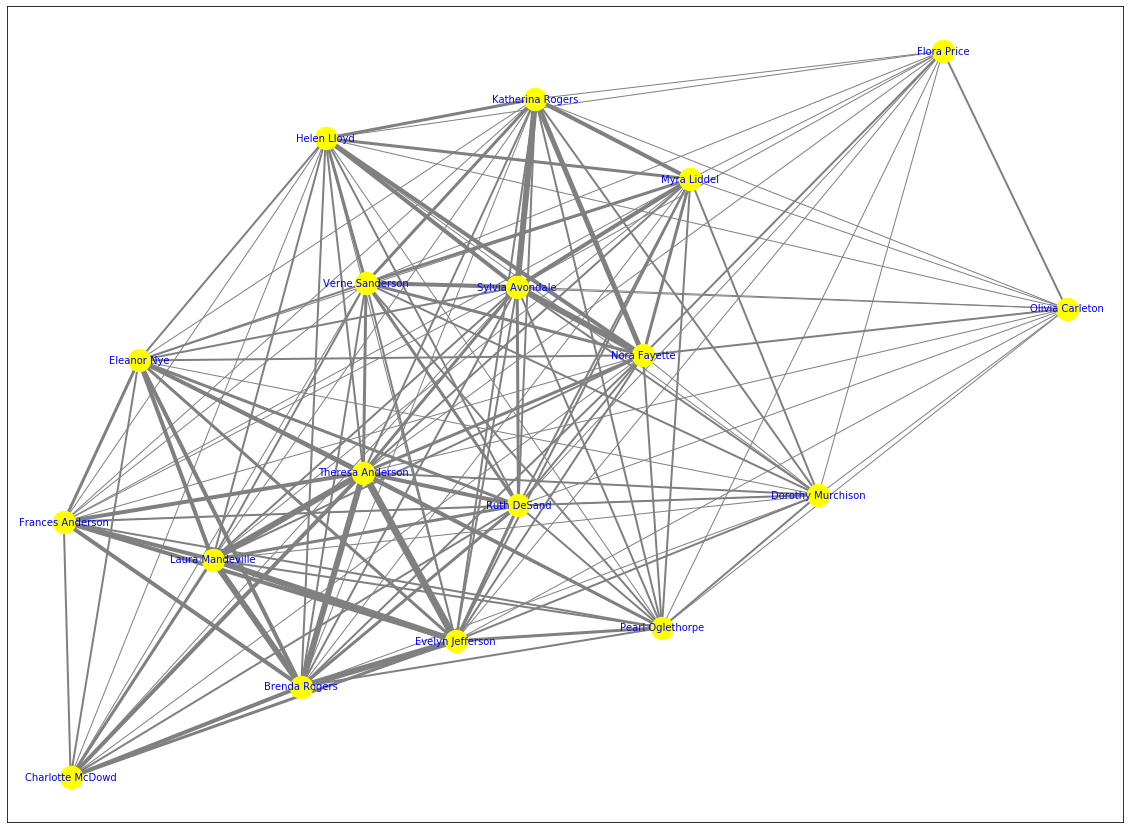

In [143]:
plt.figure(figsize=(20,15))
pos = nx.spring_layout(WW)
weights=[edata['weight'] for f,t,edata in WW.edges(data=True)]
nx.draw_networkx_nodes(WW, pos, node_color='yellow', node_size=500)
nx.draw_networkx_edges(WW, pos, width=weights, edge_color='gray')
nx.draw_networkx_labels(WW, pos, font_size=10, font_color ='blue')

plt.show()

### Women Network - Find Islands

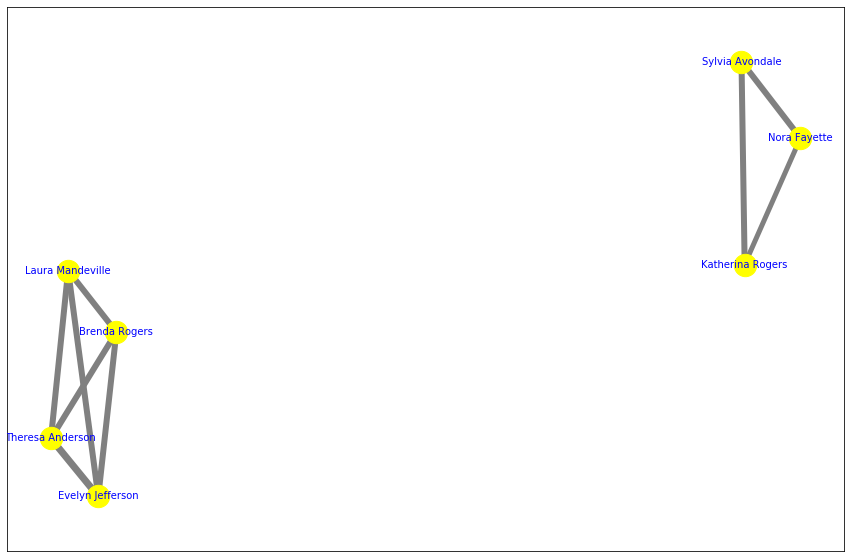

In [144]:
#Code from book - new graph with edges of weight 1 trimmed
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,weight=edata['weight'])
    return g2

def island_method(g, iterations = 5):
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

cc = list(WW.subgraph(c) for c in nx.connected_components(WW))[0]
islands = island_method(cc)
    
# use 4 for the water level
WW4 = trim_edges(WW, 4)

plt.figure(figsize=(15,10))
pos = nx.spring_layout(WW4)
weights=[edata['weight'] for f,t,edata in WW3.edges(data=True)]
nx.draw_networkx_nodes(WW4, pos, node_color='yellow', node_size=500)
nx.draw_networkx_edges(WW4, pos, width=weights, edge_color='gray')
nx.draw_networkx_labels(WW4, pos, font_size=10, font_color ='blue')

plt.show()

### Women Network Cliques

In [28]:
for index, clique in enumerate(list(nx.find_cliques(WW))):
    print('Clique:',index+1)
    print('---------------------------------------------')
    for person in clique:
        print(person)
    print('')

Clique: 1
---------------------------------------------
Verne Sanderson
Theresa Anderson
Helen Lloyd
Ruth DeSand
Evelyn Jefferson
Nora Fayette
Sylvia Avondale
Charlotte McDowd
Brenda Rogers
Frances Anderson
Laura Mandeville
Eleanor Nye

Clique: 2
---------------------------------------------
Verne Sanderson
Theresa Anderson
Helen Lloyd
Ruth DeSand
Evelyn Jefferson
Nora Fayette
Sylvia Avondale
Myra Liddel
Katherina Rogers
Pearl Oglethorpe
Dorothy Murchison
Olivia Carleton
Flora Price

Clique: 3
---------------------------------------------
Verne Sanderson
Theresa Anderson
Helen Lloyd
Ruth DeSand
Evelyn Jefferson
Nora Fayette
Sylvia Avondale
Myra Liddel
Katherina Rogers
Pearl Oglethorpe
Dorothy Murchison
Brenda Rogers
Frances Anderson
Laura Mandeville
Eleanor Nye



In [146]:
wcluster = bipartite.clustering(G, women)
wcluster

{'Evelyn Jefferson': 0.31794333117862533,
 'Laura Mandeville': 0.35181725681725684,
 'Theresa Anderson': 0.37181886740710274,
 'Brenda Rogers': 0.36491249491249494,
 'Charlotte McDowd': 0.2944116489571035,
 'Frances Anderson': 0.3148172198172198,
 'Eleanor Nye': 0.36031746031746026,
 'Pearl Oglethorpe': 0.3323412698412698,
 'Ruth DeSand': 0.36435574229691875,
 'Verne Sanderson': 0.3488328664799254,
 'Myra Liddel': 0.32440476190476186,
 'Katherina Rogers': 0.2974950396825397,
 'Sylvia Avondale': 0.322751921281333,
 'Nora Fayette': 0.26057667822373703,
 'Helen Lloyd': 0.2616989219930397,
 'Dorothy Murchison': 0.3050099206349206,
 'Olivia Carleton': 0.2575066137566138,
 'Flora Price': 0.2575066137566138}

### Weighted Club Network

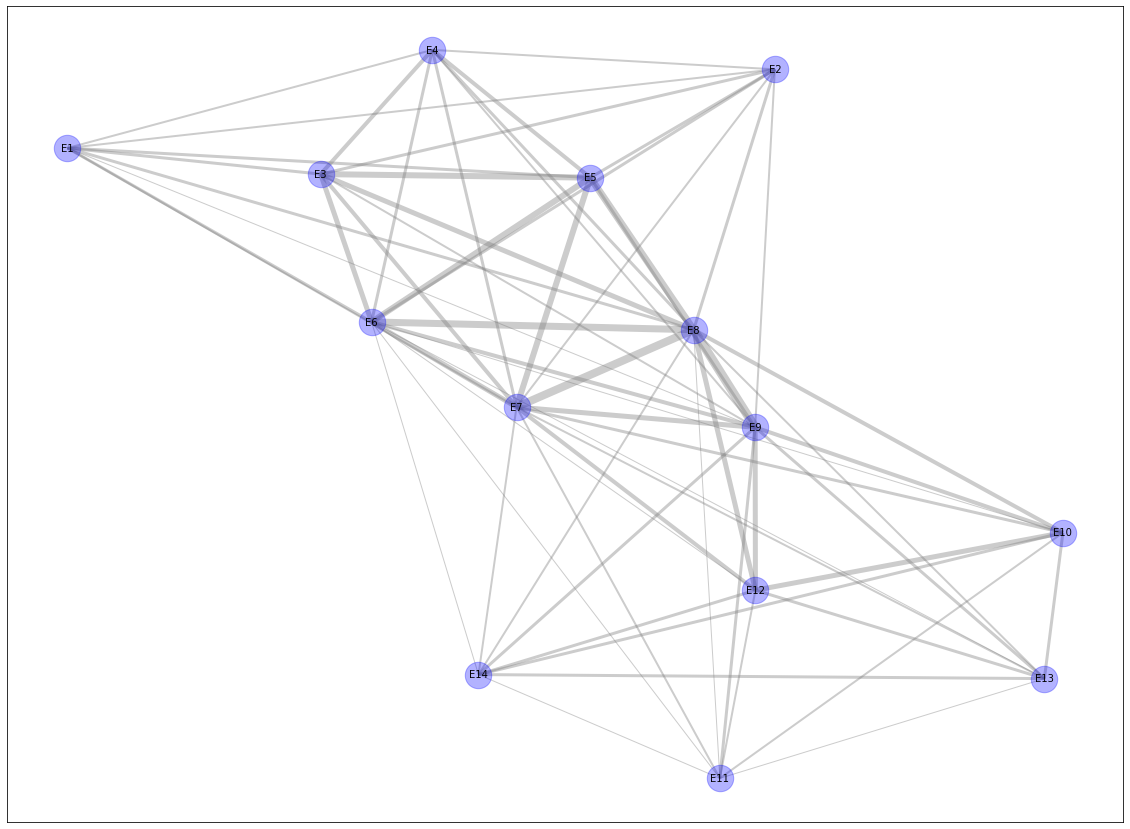

In [147]:
plt.figure(figsize=(20,15))
pos = nx.spring_layout(CW)
weights=[edata['weight'] for f,t,edata in CW.edges(data=True)]
nx.draw_networkx_nodes(CW, pos, node_color='blue', node_size=700, alpha=0.3)
nx.draw_networkx_edges(CW, pos, width=weights, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(CW, pos, font_size=10, font_color ='black')
plt.show()

### Clubs - Find Islands

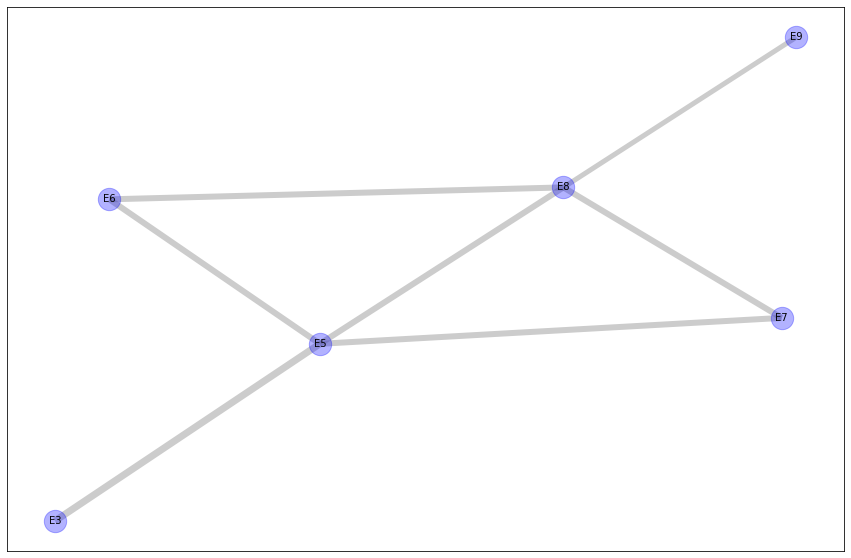

In [148]:
c_cc = list(CW.subgraph(c) for c in nx.connected_components(CW))[0]
c_islands = island_method(c_cc)
    
# use 5 for the water level
CW5 = trim_edges(CW, 5)

plt.figure(figsize=(15,10))
pos = nx.spring_layout(CW5)
weights=[edata['weight'] for f,t,edata in WW3.edges(data=True)]
nx.draw_networkx_nodes(CW5, pos, node_color='blue', node_size=500, alpha=0.3)
nx.draw_networkx_edges(CW5, pos, width=weights, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(CW5, pos, font_size=10, font_color ='black')

plt.show()